# Project Final Submission Template

### Step 1a: Planning 
#### Identify the information in the file your program will read

The file named 'global_video_game_sales_in_millions.csv' include 11 different sets of information:

1) Rank: the ranking of a video game

2) Name: the name of a video game

3) Platform: which platform a video game can be run on

4) Year: which year a video game was released 

5) Genre: the genre of a video game

6) Publisher: the publisher of a video game

7) NA_Sales: the amount of sales of a video game in North America (unit: millions)

8) EU_Sales: the amount of sales of a video game in Europe (unit: millions)

9) JP_Sales: the amount of sales of a video game in Japan (unit: millions)

10) Other_Sales: the amount of sales of a video game in other places (unit: millions)

11) Global_Sales: the total amount of sales of a video game globally (unit: millions)

### Step 1b: Planning 
#### Write a description of what your program will produce

I'm interested in below questions:

1) Where is the most popular market for video games worldwide?

2) What platform is the most popular one for the genre of Role-Playing video games? 

3) What is the most popular genre of video games after the year of 2000?

4) Which publisher produced most of Sports video games?

5) Which region has the highest amount of sales of Role-Playing video games during 2000 to 2010? Plot a bar chart to show the amounts of sales in four different regions (including north america, europe, japan, and other region) during 2000 to 2010.

I will work on question 5) and extract some data, do some computations to find the amount of sales of Role-Playing video games during 2000 to 2010 for each region, and finally generate a bar chart to present the results. As predicted, we could tell which region has the highest amount of sales of Role-Playing video games during 2000 to 2010 from the bar chart.

### Step 1c: Planning 
#### Write or draw examples of what your program will produce

Here's an example that shows the kind of output I expect from this program:

expect(plot_bar('global_video_game_sales_in_millions.csv'), None)

In the below bar chart, x-axis is 4 different regions (NA, EU, JP, other), y-axis is the amount of sales (millions); four bars from the left to the right on the chart represent the total amount of sales of the Role-Playing video games in NA, EU, JP, and other regions during 2000 to 2010, after doing their computations respectively; e.g. "EU" might have the highest amount of sales.


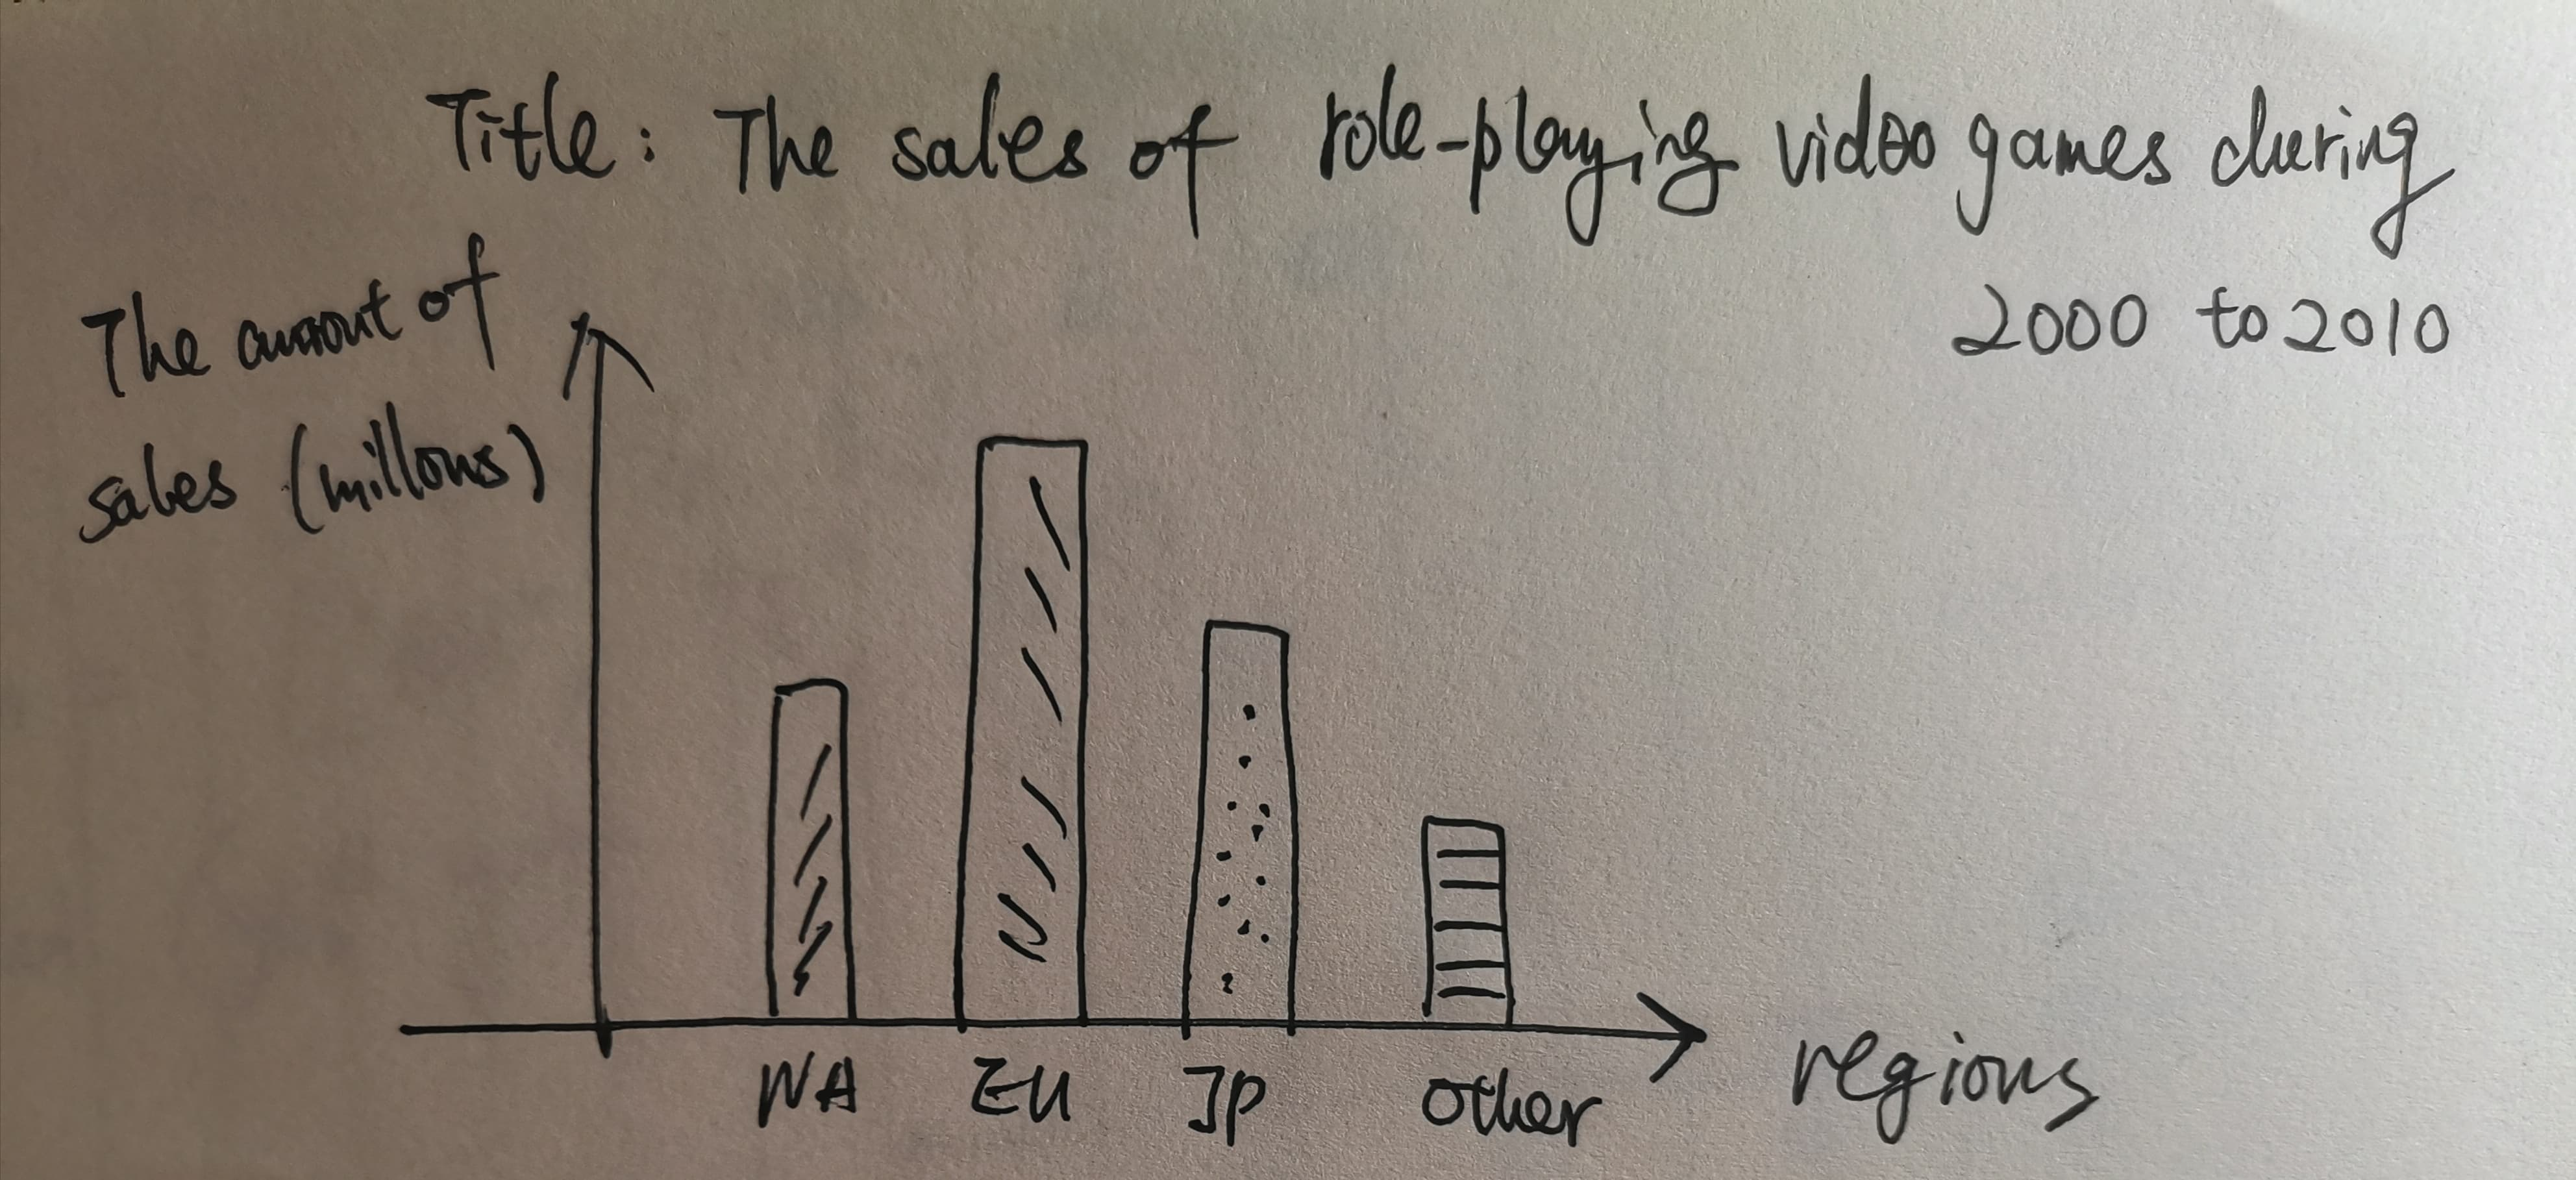

### Step 2a: Building
#### Design data definitions

I will store 6 subsets of data from the chosen file, including years when video games were released; genres of video games; the amounts of sales of video games in four regions , including North America, Europe, Japan, and other regions in the world (unit: millions). I'm interested in which region has the highest amount of sales of Role-Playing video games during 2000 to 2010, so the information of years and genres would be used to filter out a list of Role-Playing video games in a certain time period (2000-2010); then I'd like to calculate each regions' total amount of sales of these video games, and compare them to see which region has the highest amount of sales; a bar chart is good to represent each region's respective total amount, so audience could see the highest one clearly.

In [1]:
from cs103 import *
from typing import NamedTuple, List
import csv

##################
# Data Definitions

VideoGame= NamedTuple('VideoGame',[('year',int),    #in range [0,...)
                                   ('genre',str),
                                   ('na_sales',float),  #in range [0,...)
                                   ('eu_sales',float),  #in range [0,...)
                                   ('jp_sales',float),  #in range [0,...)
                                   ('other_sales',float)]) #in range [0,...)

#interp. Video games with the name ('name'), the year ('year'),
#        the genre ('genre') and the amounts of sales in North America ('na_sales'),
#        Europe ('eu_sales'), Japan ('jp_sales'), and other regions in the world('other_sales') 

VG1=VideoGame(1985,'Platform',29.08,3.58,6.81,0.77)
VG2=VideoGame(2009,'Sports',15.75,11.01,3.28,2.96)

#template based on Compound
@typecheck
def fn_for_video_game(vg:VideoGame)->...:
    return ...(vg.year,
               vg.genre,
               vg.na_sales,
               vg.eu_sales,
               vg.jp_sales,
               vg.other_sales)


#List[VideoGame]
#interp. a list of video games

LOVG1=[]
LOVG2=[VG1, VG2]

# template based on arbitrary-sized and the reference rule
@typecheck
def fn_for_lovg(lovg: List[VideoGame])->...:
    #description of the acc 
    acc=...  #type:...
    
    for vg in lovg:
        acc=...(fn_for_video_game(vg),acc)
        
    return ...(acc)

### Step 2b and 2c: Building
#### Design a function to read the information and store it as data in your program
#### Design functions to analyze the data


Complete these steps in the code cell below. You will likely want to rename the analyze function so that the function name describes what your analysis function does.

In [2]:
@typecheck
def read(filename:str)->List[VideoGame]:
    """
    reads information from the specified file and returns a list of video games 
    """
    #return []  #stub
    # Template from HtDAP
    
    # lovg contains the results so far 
    lovg=[] #typecheck:List[VideoGame]
    
    with open(filename) as csvfile:
        
        reader = csv.reader(csvfile)
        next(reader) # skip header line
        
        for row in reader:
            # you may not need to store all the rows, and you may need
            # to convert some of the strings to other types
            vg = VideoGame(parse_int(row[3]),
                           row[4],
                           parse_float(row[6]),
                           parse_float(row[7]),
                           parse_float(row[8]),
                           parse_float(row[9]))
            lovg.append(vg)

    return lovg

# Begin testing
start_testing()

# Examples and tests for read
expect(read('global_video_game_sales_in_millions_test1.csv'),[VideoGame(2006,'Sports',41.49,29.02,3.77,8.46),
                                                              VideoGame(1985,'Platform',29.08,3.58,6.81,0.77),
                                                              VideoGame(2008,'Racing',15.85,12.88,3.79,3.31)])
expect(read('global_video_game_sales_in_millions_test2.csv'),[VideoGame(2006,'Sports',41.49,29.02,3.77,8.46),
                                                              VideoGame(1985,'Platform',29.08,3.58,6.81,0.77),
                                                              VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                                                              VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                                                              VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1),
                                                              VideoGame(1989,'Puzzle',23.2,2.26,4.22,0.58)]) 

# show testing summary
summary()

2 of 2 tests passed


#### Composition and the reference rule
We need to follow below steps to solve build this project:

(1)filter the list of video games during 2000 to 2010;

(2)filter the list of Role-Playing video games in 2000-2010;

(3)find the total amount of sales of Role-Playing video games for each region;

(4)plot a bar chart to show results, so we can compare which region has the highest amount of sales.

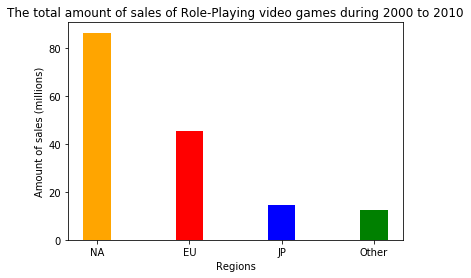

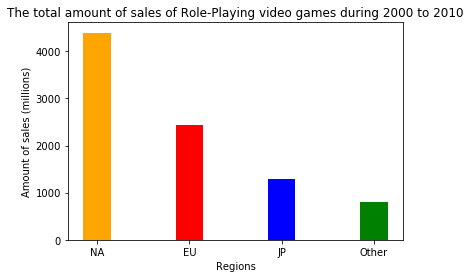

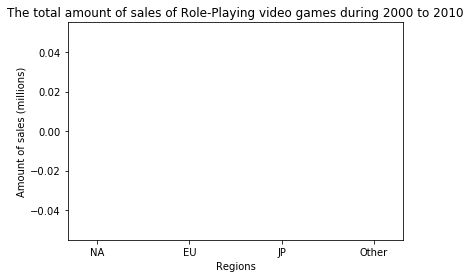

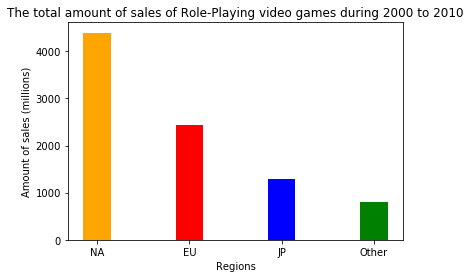

29 of 29 tests passed


In [3]:
from matplotlib import pyplot

@typecheck
def main(filename: str) ->None:
    """
    Reads the file from given filename, analyzes the data, returns the result 
    """
    # Template from HtDAP, based on function composition 

    return plot_bar(read(filename))

#Here is the composition recipe with its helper functions to remind myself:
#return plot_bar(na_sales(filter_role_playing(filter_years(lovg))),
#        eu_sales(filter_role_playing(filter_years(lovg))),
#       jp_sales(filter_role_playing(filter_years(lovg))),
#        other_sales(filter_role_playing(filter_years(lovg))))


@typecheck
def plot_bar(lovg:List[VideoGame])->None:
    """
    shows a bar chart of the total amount of sales of Role-Playing video games 
    in 2000-2010 against to four different regions
    """
    #return None #stub

    #template based on visualization
    #set the x-axis label, y-axis label, the plot title 
    pyplot.xlabel('Regions')
    pyplot.ylabel('Amount of sales (millions)')
    pyplot.title('The total amount of sales of Role-Playing video games during 2000 to 2010')

    #plot the data
    x_values=['NA','EU','JP','Other']
    y_values=[na_sales(lovg),eu_sales(lovg),jp_sales(lovg),other_sales(lovg)]
    pyplot.bar(x_values, y_values, align='center', color=('orange', 'red', 'blue', 'green'),width = 0.3)
    
    #show the plot
    pyplot.show()
    
    return None


@typecheck
def na_sales(lovg:List[VideoGame]) -> float: 
    """ 
    returns the total amount of sales in North America
    """ 
    #return 0.0  #stub
    #template from List[VideoGame]
  
    #the total amount in the list seen so far
    na_amount = 0.0  #type:float
    for vg in lovg:
        na_amount = na_amount + vg.na_sales
    
    return na_amount


@typecheck
def eu_sales(lovg:List[VideoGame]) -> float: 
    """ 
    returns the total amount of sales in Europe
    """ 
    #return 0.0  #stub
    #template from List[VideoGame]
  
    #the total amount in the list seen so far
    eu_amount = 0.0  #type:float
    for vg in lovg:
        eu_amount = eu_amount + vg.eu_sales
    
    return eu_amount


@typecheck
def jp_sales(lovg:List[VideoGame]) -> float: 
    """ 
    returns the total amount of sales in Japan
    """ 
    #return 0.0  #stub
    #template from List[VideoGame]
  
    #the total amount in the list seen so far
    jp_amount = 0.0  #type:float
    for vg in lovg:
        jp_amount = jp_amount + vg.jp_sales
    
    return jp_amount


@typecheck
def other_sales(lovg:List[VideoGame]) -> float: 
    """ 
    returns the total amount of sales in other regions
    """ 
    #return 0.0  #stub
    #template from List[VideoGame]
  
    #the total amount in the list seen so far
    other_amount = 0.0  #type:float
    for vg in lovg:
        other_amount = other_amount + vg.other_sales
    
    return other_amount


@typecheck
def filter_years(lovg:List[VideoGame])->List[VideoGame]:
    """
    returns a list of video games during 2000 to 2010
    """
    #return [] #stub
    #template from List[VideoGame]
    
    #the list of video games during 2000-2010 seen so far 
    games = []  #type:List[VideoGame]
    
    for vg in lovg:
        if 2000<= vg.year <= 2010:
            games = games + [vg]
        
    return games
    

@typecheck
def filter_role_playing(lovg:List[VideoGame])->List[VideoGame]:
    """
    returns a list of all role-playing video games in 2000-2010
    """
    #return [] #stub
    #template from List[VideoGame]
    
    #the list of role-playing video games in 2000-2010 seen so far 
    role_games = []  #type:List[VideoGame]
    
    for vg in lovg:
        if is_role_playing(vg):
            role_games = role_games + [vg]
        
    return role_games


@typecheck
def is_role_playing(vg:VideoGame)->bool:
    """
    returns True if the genre of video games is Role-Playing
    """
    #return True #stub
    #template from VideoGame
    if vg.genre == 'Role-Playing':
        return True
    else:
        return False


start_testing()

# Examples and tests for main

expect(main('global_video_game_sales_in_millions_test1.csv'), None)
expect(main('global_video_game_sales_in_millions.csv'), None)

# Both of these two tests should produce something like:
#   # Amount of sales (millions)
#     |                                                                       
#     |   *                                                                       
#     |   *                                                                       
# 100 |   *     *                                                           
#     |   *     *                                                          
#     |   *     *    *                                                            
#     |   *     *    *                                                          
#     |   *     *    *     *                                                           
#  50 |   *     *    *     *                                                    
#     |   *     *    *     *                                                          
#     |   *     *    *     *                                                        
#     |   *     *    *     *                                                           
#     |   *     *    *     *                                                    
#     +----------------------------->  Regions
#         NA    EU   JP  Other


# Examples and tests for plot_bar

# This example should produce an empty graph
expect(plot_bar([]), None)

#This example should produce something similar like those in tests for main
expect(plot_bar(read('global_video_game_sales_in_millions.csv')), None)

# Examples and tests for na_sales
expect(na_sales(LOVG1), 0)
expect(na_sales(LOVG2), 44.83)
expect(na_sales([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),42.87)
expect(na_sales([VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),33.44)

# Examples and tests for eu_sales
expect(eu_sales(LOVG1), 0)
expect(eu_sales(LOVG2), 14.59)
expect(eu_sales([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),32.78)
expect(eu_sales([VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),24.42)

# Examples and tests for jp_sales
expect(jp_sales(LOVG1), 0)
expect(jp_sales(LOVG2), 10.09)
expect(jp_sales([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),17.29)
expect(jp_sales([VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),19.54)

# Examples and tests for other_sales
expect(other_sales(LOVG1), 0)
expect(other_sales(LOVG2), 3.73)
expect(other_sales([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),7.27)
expect(other_sales([VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),5.33)

# Examples and tests for filter_years
expect(filter_years(LOVG1), [])
expect(filter_years([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                           VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                           VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),
                          [VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                           VideoGame(2009,'Sports',15.75,11.01,3.28,2.96)])
expect(filter_years(LOVG2),[VG2])

# Examples and tests for filter_role_playing
expect(filter_role_playing(LOVG1), [])
expect(filter_role_playing([VideoGame(2008,'Racing',15.85,12.88,3.79,3.31),
                           VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                           VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),
                           [VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)])
expect(filter_role_playing([VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                           VideoGame(2009,'Sports',15.75,11.01,3.28,2.96),
                           VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)]),
                           [VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37),
                            VideoGame(1996,'Role-Playing',11.27,8.89,10.22,1)])

# Examples and tests for is_role_playing
expect(is_role_playing(VG1), False)
expect(is_role_playing(VG2), False)
expect(is_role_playing(VideoGame(2006,'Role-Playing',6.42,4.52,6.04,1.37)), True)

summary()